# WeatherPy

---

## Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Import pretty print
from pprint import pprint

### Generate the Cities List by Using the `citipy` Library

In [93]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations

lats = np.random.uniform(lat_range[0], lat_range[1], size=1000)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 441


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [95]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "q=" + city + "&appid=" + weather_api_key + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | margaret river
Processing Record 3 of Set 1 | coahuayana de hidalgo
Processing Record 4 of Set 1 | conde
Processing Record 5 of Set 1 | shalkar
Processing Record 6 of Set 1 | tsiombe
Processing Record 7 of Set 1 | banff
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | lewistown
Processing Record 11 of Set 1 | pandan
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | palmares do sul
Processing Record 14 of Set 1 | talnakh
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | san pedro pochutla
Processing Record 17 of Set 1 | usinsk
Processing Record 18 of Set 1 | bilibino
Processing Record 19 of Set 1 | kanniyakumari
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | atafu village
Processing Record 22 of Set 1 | isafjordur
Pro

In [97]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          422
Lat           422
Lng           422
Max Temp      422
Humidity      422
Cloudiness    422
Wind Speed    422
Country       422
Date          422
dtype: int64

In [99]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,-0.21,69,20,1.03,AR,1722879065
1,margaret river,-33.9500,115.0667,16.11,84,64,7.45,AU,1722879159
2,coahuayana de hidalgo,18.7000,-103.6583,33.01,53,72,2.41,MX,1722879160
3,conde,-7.2597,-34.9075,28.70,51,40,7.20,BR,1722878811
4,shalkar,47.8288,59.6258,31.77,25,62,6.97,KZ,1722879162


In [101]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [103]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-0.21,69,20,1.03,AR,1722879065
1,margaret river,-33.9500,115.0667,16.11,84,64,7.45,AU,1722879159
2,coahuayana de hidalgo,18.7000,-103.6583,33.01,53,72,2.41,MX,1722879160
3,conde,-7.2597,-34.9075,28.70,51,40,7.20,BR,1722878811
4,shalkar,47.8288,59.6258,31.77,25,62,6.97,KZ,1722879162


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

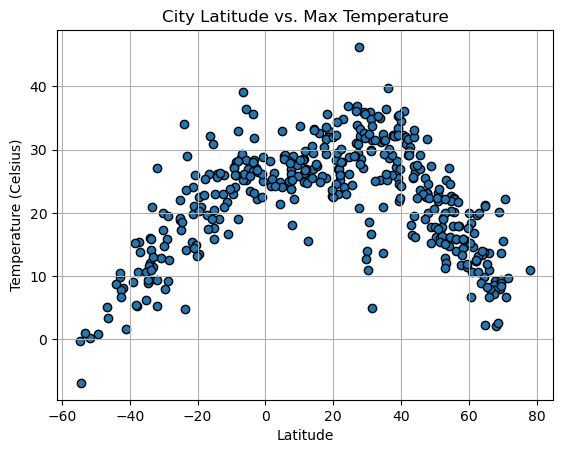

In [107]:
# Build scatter plot for latitude vs. temperature
latitudes = city_data_df['Lat']
temperatures = city_data_df['Max Temp']
plt.scatter(latitudes, temperatures, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

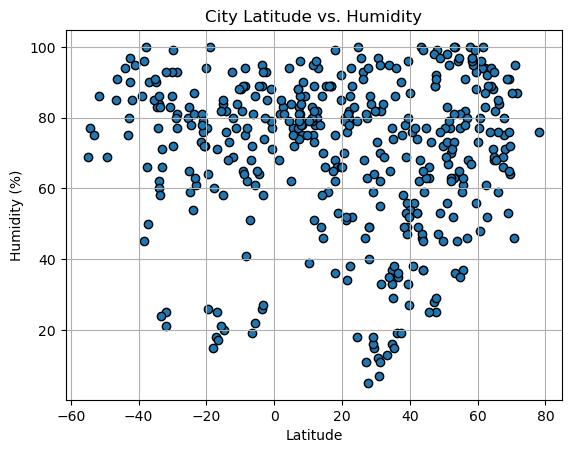

In [111]:
# Build the scatter plots for latitude vs. humidity
humidities = city_data_df['Humidity']
plt.scatter(latitudes, humidities, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

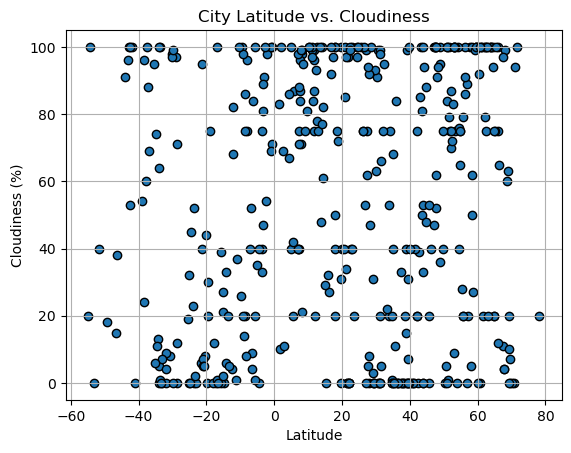

In [115]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitudes, cloudiness, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

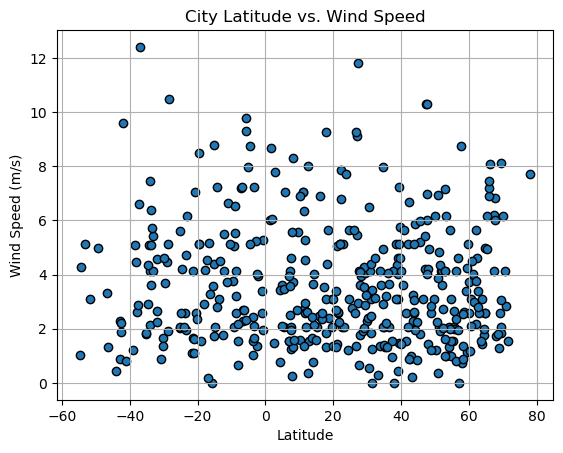

In [117]:
# Build the scatter plots for latitude vs. wind speed
wind_speeds = city_data_df['Wind Speed']
plt.scatter(latitudes, wind_speeds, marker = "o", edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [119]:
# Define a function to create Linear Regression plots
def linreg(x_values, y_values, x_label, y_label, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"R-squared value: {rvalue**2}")
    print(f"Regression equation: {line_eq}")
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    

In [121]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,coahuayana de hidalgo,18.7000,-103.6583,33.01,53,72,2.41,MX,1722879160
4,shalkar,47.8288,59.6258,31.77,25,62,6.97,KZ,1722879162
6,banff,51.1762,-115.5698,17.65,67,1,2.06,CA,1722879164
7,iskateley,67.6803,53.1512,9.20,75,4,6.84,RU,1722878642
9,lewistown,40.5992,-77.5714,32.30,76,0,3.60,US,1722879168


In [123]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,-0.21,69,20,1.03,AR,1722879065
1,margaret river,-33.9500,115.0667,16.11,84,64,7.45,AU,1722879159
3,conde,-7.2597,-34.9075,28.70,51,40,7.20,BR,1722878811
5,tsiombe,-25.3000,45.4833,18.84,80,19,2.04,MG,1722878598
8,port-aux-francais,-49.3500,70.2167,0.79,69,18,4.99,TF,1722879167


###  Temperature vs. Latitude Linear Regression Plot

R-squared value: 0.4045988621017093
Regression equation: y = -0.26x + 33.29


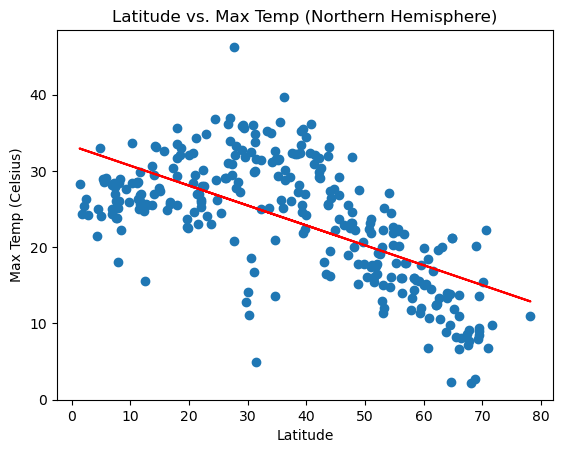

In [125]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
linreg(x_values, y_values, "Latitude", "Max Temp (Celsius)", "Latitude vs. Max Temp (Northern Hemisphere)")

R-squared value: 0.7203132042487126
Regression equation: y = 0.54x + 30.44


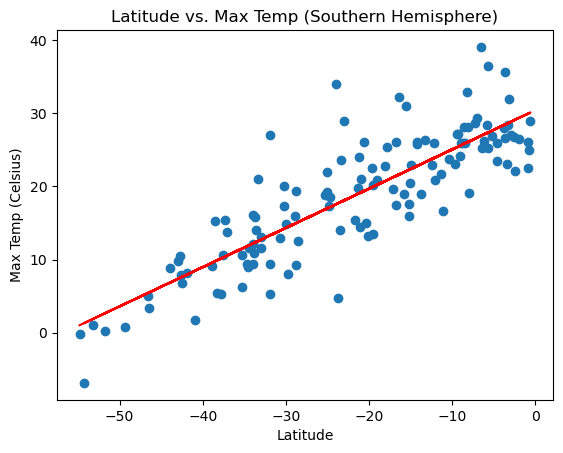

In [127]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
linreg(x_values, y_values, "Latitude", "Max Temp (Celsius)", "Latitude vs. Max Temp (Southern Hemisphere)")

**Discussion about the linear relationship:** Out of all plots, these plots for Latitude vs. Max Temperature have the highest correlations. Although not perfect, and with the results of this particular sample for the southern hemisphere having a notably higher r-squared value than those of the northern hemisphere (0.72 and 0.40, respectively), the plots demonstrate that there is generally a correlation between latitude and maximum temperature. For both the northern and southern hemispheres, the max temperature increases as the latitude nears 0, or the equator, and decreases as the latitude value gets farther from 0, either in the positive or negative directions.

### Humidity vs. Latitude Linear Regression Plot

R-squared value: 0.0004630721521738731
Regression equation: y = 0.02x + 68.54


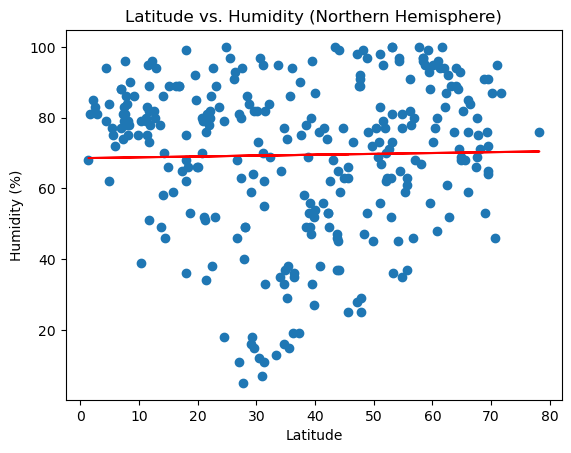

In [129]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
linreg(x_values, y_values, "Latitude", "Humidity (%)", "Latitude vs. Humidity (Northern Hemisphere)")

R-squared value: 0.025727388256975077
Regression equation: y = -0.24x + 66.49


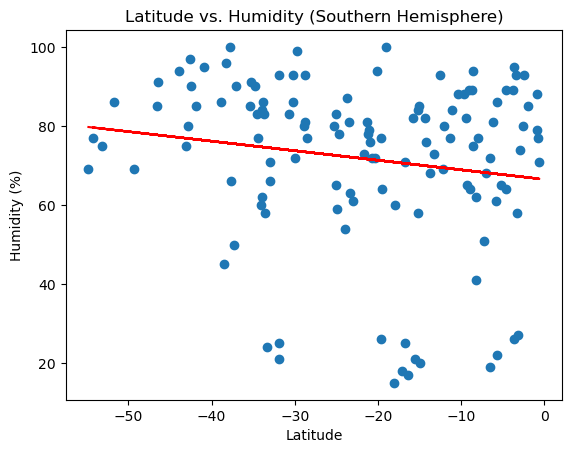

In [133]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
linreg(x_values, y_values, "Latitude", "Humidity (%)", "Latitude vs. Humidity (Southern Hemisphere)")

**Discussion about the linear relationship:** The correlation between latitude and humidity is fairly low. For both the northern and southern hemispheres, the r-squared values are below 0.1, indicating a very weak, if not non-existent, relationship. In the northern hemisphere, there may be somewhat of a relationship, where latitudes between 0 and 10 tend to have fairly high humidities, but this trend does not continue as latitude increases, and it would be difficult to make a predictive statement based on linear regression alone. Perhaps oddly, in the southern hemisphere, more negative latitudes (such as those between -60 and -40) have their humidities concentrated more in the high range. As the equator is neared, humidity develops a greater range, with some locations near the equator having close to 20% humidity, and others nearing 100% humidity.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared value: 0.00470953527033805
Regression equation: y = -0.14x + 61.94


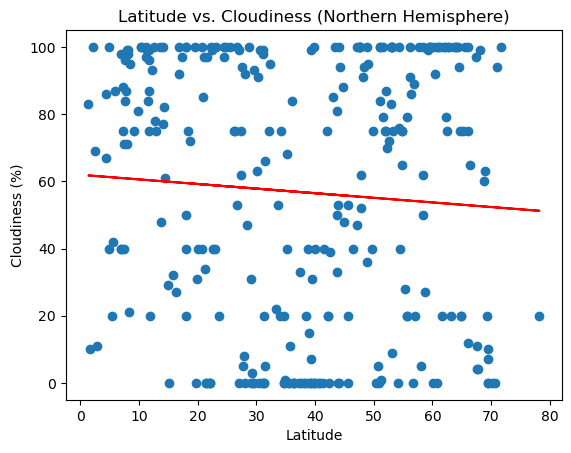

In [135]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
linreg(x_values, y_values, "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness (Northern Hemisphere)")

R-squared value: 0.0019844963521926493
Regression equation: y = 0.12x + 44.74


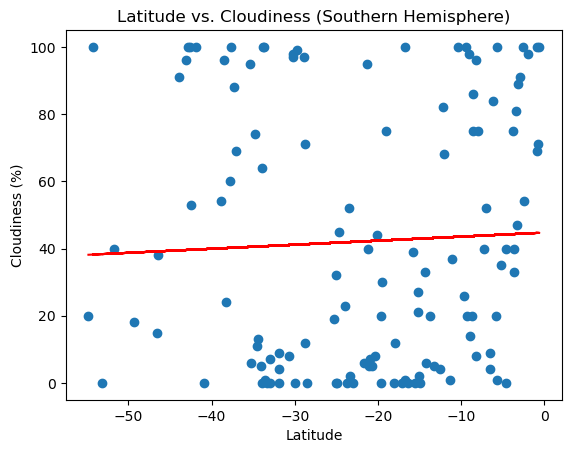

In [137]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
linreg(x_values, y_values, "Latitude", "Cloudiness (%)", "Latitude vs. Cloudiness (Southern Hemisphere)")

**Discussion about the linear relationship:** Again, here there is a very low correlation between latitude and percent cloudiness. There is even less of an ability to draw any sort of conclusion regarding linearity than in the humidity plots. The r-squared values for both the northern and southern hemispheres are below 0.005. The only apparent trends seem to be of measurement, with horizontal lines of data points appearing at values such as 100%, 75%, 40%, 20%, and 0%; these trends seem to exist irrespective of latitude.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared value: 6.893936218375757e-05
Regression equation: y = -0.0x + 3.53


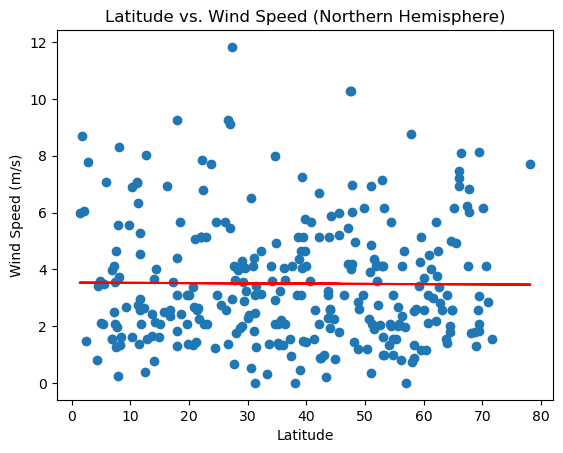

In [141]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
linreg(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed (Northern Hemisphere)")

R-squared value: 0.005041715757641467
Regression equation: y = 0.01x + 4.1


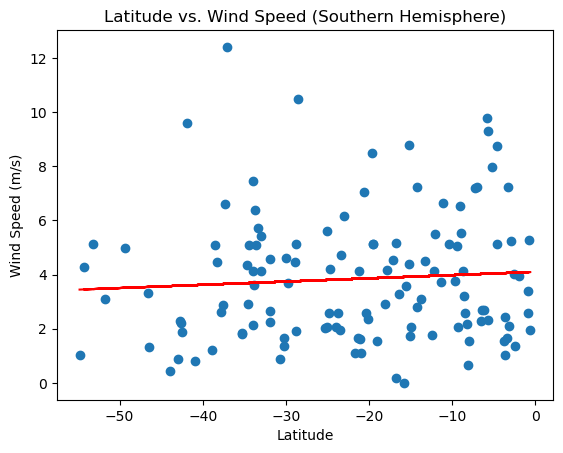

In [143]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
linreg(x_values, y_values, "Latitude", "Wind Speed (m/s)", "Latitude vs. Wind Speed (Southern Hemisphere)")

**Discussion about the linear relationship:** These plots again have very low correlations, both very close to 0. Wind speed appears to be all over the board, no matter the latitudinal position of the measurement.